# Maximum likelihood for the generalized extreme value distribution

In this notebook, we will continue with the dataset from the notebook about the `Dataset` object.
The maximum likelihood estimator for the generalized estreme value distribution will be illustrated.
For more information about `Estimate`s, see the notebook about the Hill estimator.

Let's continue with the dataset from the `Dataset` notebook.

In [1]:
from evt.dataset import Dataset
from evt.methods.block_maxima import BlockMaxima
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pareto, norm

N_DATAPOINTS = 100000  # number of datapoints in the example set
N_SAMPLES_PER_BLOCK = 500  # number of samples per block in the block maxima approach
NORMAL_STD = 5  # standard deviation of the normal distribution
PARETO_SHAPE = 2.5  # shape parameter of the Pareto distribution
EXAMPLE_NAME = 'Values'  # for nicer plots
EXAMPLE_INDEX_NAME = 'Index'

np.random.seed(0)  # enforce deterministic behaviour

series = pd.Series(
    norm.rvs(scale=NORMAL_STD, size=N_DATAPOINTS) + pareto.rvs(PARETO_SHAPE, size=N_DATAPOINTS),
    name=EXAMPLE_NAME
)
series.index.name = EXAMPLE_INDEX_NAME

dataset = Dataset(series)

block_maxima = BlockMaxima(dataset, N_SAMPLES_PER_BLOCK)

Create a maximum likelihood estimator object.

In [2]:
from evt.estimators.gevmle import GEVMLE

mle = GEVMLE(block_maxima)

The estimator will fit three parameters of the generalized extreme value distribution:

* the tail index,
* the location parameter,
* the scale parameter.


In [3]:
tail_estimate, loc_estimate, scale_estimate = mle.estimate()
print('Tail: ', tail_estimate)
print('Loc:  ', loc_estimate)
print('Scale:', scale_estimate)

Tail:  Estimate(estimate=0.5878744254035222, ci_lower=0.4555899514918156, ci_upper=0.7201588993152288, confidence_level=0.95)
Loc:   Estimate(estimate=17.59729092289706, ci_lower=17.086949575790207, ci_upper=18.10763227000391, confidence_level=0.95)
Scale: Estimate(estimate=3.290171278403122, ci_lower=2.7657459481198647, ci_upper=3.814596608686379, confidence_level=0.95)


In our example, the tail index is already known to be 1/2.5 = 0.4.
Confidence intervals are based on observed Fisher information.
Bias is not taken into account.

A quantile-quantile plot of the fitted distribution can be used to investigate quality of fit.

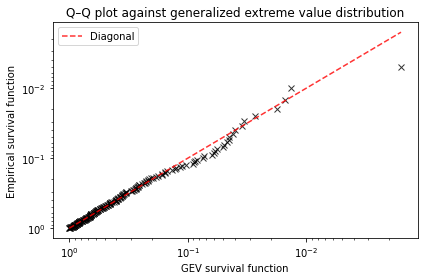

In [4]:
fig, ax = plt.subplots()

mle.plot_qq_gev(ax)

fig.tight_layout()
plt.show()